# Practice Exercise on Convolutional Neural Networks (CNN)

Welcome to the Practice Exercise on Convolutional Neural Networks (CNN). In this exercise, we will focus on an image classification task where the goal is to predict whether an image contains a cat or a dog. We will work with a dataset of labeled images and build, train, and evaluate a CNN model. This practice will allow you to apply your understanding of CNNs to achieve high accuracy in image classification.

---

## Dataset Overview

### **Dataset Name:** Cats and Dogs Image Dataset

### **Description:**  
The dataset contains images of cats and dogs labeled for classification purposes. Each image belongs to one of the two classes: 'Cat' or 'Dog'. The goal is to classify the images correctly based on the content (i.e., whether the image is of a cat or a dog). The dataset is often used to test image classification models.

### **Features:**
There are two main folders which are:
- `Cat`: Images labeled as containing a cat.
- `Dog`: Images labeled as containing a dog.

### **Target Variable:**
- The goal is to predict whether an image contains a cat or a dog.


## Data Loading and Preprocessing


We will start by loading the dataset and preprocessing the images. This includes:
- Resizing images .
- Normalizing pixel values.

Add more if needed!


In [77]:
%pip install -q opendatasets


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [78]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/tongpython/cat-and-dog')


Skipping, found downloaded files in ".\cat-and-dog" (use force=True to force download)


In [79]:
import os
import numpy as np
import keras
from keras import layers
from tensorflow import data as tf_data
import matplotlib.pyplot as plt

## Data Splitting
In this section, we will split our dataset into three parts:

* Training set (70%): This portion of the dataset is used to train the CNN model.
* Validation set (15%): This portion is used to validate the model during training, helping us tune hyperparameters and avoid overfitting.
* Test set (15%): This portion is used to evaluate the model after training, to check its generalization to unseen data.

In [80]:
import os

num_skipped = 0
for folder_name in ("Cat", "Dog"):
    folder_path = os.path.join("/content/cat-and-dog/training_set/training_set", folder_name)
    if not os.path.exists(folder_path):
        print(f"The folder {folder_path} does not exist.")
        continue
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = b"JFIF" in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            os.remove(fpath)

print(f"Deleted {num_skipped} images.")


The folder /content/cat-and-dog/training_set/training_set\Cat does not exist.
The folder /content/cat-and-dog/training_set/training_set\Dog does not exist.
Deleted 0 images.


In [81]:
image_size = (180, 180)
batch_size = 128

train_ds, val_ds = keras.utils.image_dataset_from_directory(
    'C:\\Users\\abdau\\OneDrive\\Desktop\\Exercise\\cat-and-dog\\training_set',
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 8005 files belonging to 1 classes.
Using 6404 files for training.
Using 1601 files for validation.


In [82]:
for images, labels in train_ds.take(1):
    for i in range(9):
        print(f"Label: {labels[i].numpy()} - {'Dog' if labels[i].numpy() == 1 else 'Cat'}")

Label: 0 - Cat
Label: 0 - Cat
Label: 0 - Cat
Label: 0 - Cat
Label: 0 - Cat
Label: 0 - Cat
Label: 0 - Cat
Label: 0 - Cat
Label: 0 - Cat


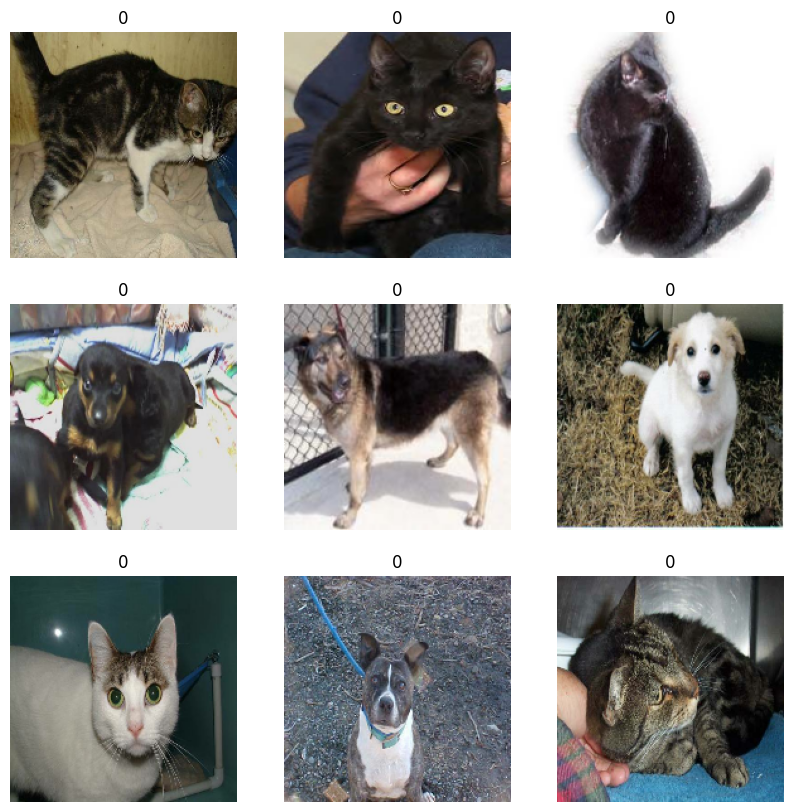

In [83]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [84]:
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
]


def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

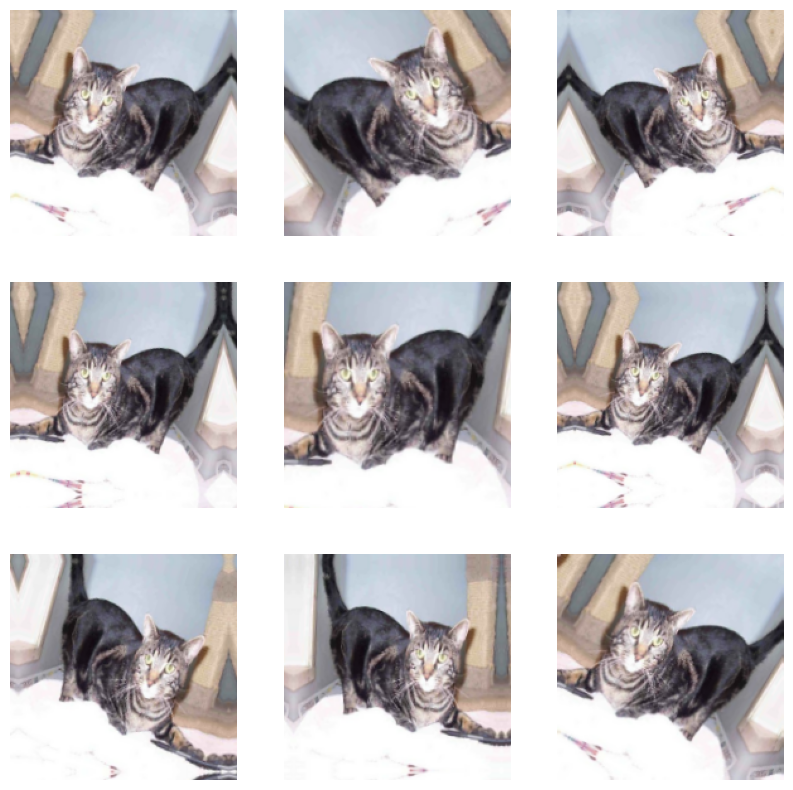

In [85]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(augmented_images[0]).astype("uint8"))
        plt.axis("off")

## Building the CNN Model


Now, we will define our CNN architecture using `tensorflow.keras`. The architecture will consist of:
- Convolutional layers followed by max-pooling layers
- Flatten layer
- Dense layers
- Output layer


In [86]:
import tensorflow as tf
import keras
from keras import models, datasets
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam

In [87]:
model = models.Sequential([
    layers.Input(shape=(180, 180, 3)),
    layers.Rescaling(1./255),

    # Conv Block
     layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPool2D(2,2),
    layers.Dropout(0.2),

 

    # Output
    layers.Flatten(),
    layers.Dense(16, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(1, activation="sigmoid")
    ])

model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_5 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 180, 180, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 259200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 16)             │     4,147,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,157,505 (15.86 MB)

 Trainable params: 4,157,505 (15.86 MB)

 Non-trainable params: 0 (0.00 B)

## Training the Model


Train the CNN model using the `fit` function. We will use the training and validation we created earlier.

Fill in the code to train the model for a specified number of epochs.


In [88]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [89]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

## Evaluating the Model


After training, evaluate the model on the validation data to check its performance.


In [90]:
model.fit(train_ds, epochs=10,batch_size=32, validation_data=val_ds)

Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 49s 932ms/step - accuracy: 0.9857 - loss: 0.0569 - val_accuracy: 1.0000 - val_loss: 1.7444e-28
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 47s 927ms/step - accuracy: 1.0000 - loss: 4.4504e-24 - val_accuracy: 1.0000 - val_loss: 1.0122e-28
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 47s 917ms/step - accuracy: 1.0000 - loss: 1.5425e-24 - val_accuracy: 1.0000 - val_loss: 1.0088e-28
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 47s 914ms/step - accuracy: 1.0000 - loss: 3.0570e-24 - val_accuracy: 1.0000 - val_loss: 1.0088e-28
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 47s 914ms/step - accuracy: 1.0000 - loss: 4.5706e-24 - val_accuracy: 1.0000 - val_loss: 1.0088e-28
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 47s 919ms/step - accuracy: 1.0000 - loss: 4.7935e-24 - val_accuracy: 1.0000 - val_loss: 1.0088e-28
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 47s 915ms/step - accuracy: 1.0000 - loss: 4.2197e-24 - val_accuracy: 1.0000 - val_loss: 1.0088e-28
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 47s 914

**bold text**## Testing with New Images

In [91]:
model.evaluate(val_ds)

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 213ms/step - accuracy: 1.0000 - loss: 1.5389e-29


[1.0087917529965831e-28, 1.0]

Finally, let's test the model with some new images. Preprocess the images and use the trained model to predict whether the image is of a cat or a dog.


In [92]:
model.save('path_to_your_model.h5')

In [93]:
#Testing with New Images

from tensorflow.keras.models import load_model

# تحميل النموذج المدرب
model = load_model('path_to_your_model.h5')


In [94]:
from tensorflow.keras.preprocessing import image
import numpy as np

# وظيفة لتحضير الصور الجديدة
def prepare_image(file_path, img_size=(180, 180)):
    img = image.load_img(file_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # قم بتطبيع الصورة إذا كان النموذج قد تم تدريبه على صور مطبعة
    return img_array


In [95]:
# تحميل وتحضير الصورة الجديدة
new_image = prepare_image("C:\\Users\\abdau\\OneDrive\\Desktop\\Exercise\\cat-and-dog\\test_set\\test_set\\cats\\cat.4001.jpg")

# التنبؤ باستخدام النموذج
prediction = model.predict(new_image)

# افتراض أن التسمية ستكون إما 0 أو 1
predicted_class = np.argmax(prediction, axis=1)

# طباعة النتيجة
class_names = ["Cat", "Dog"]  # استخدم نفس أسماء الفئات التي تم تدريب النموذج عليها
print(f"The model predicts this image as a {class_names[predicted_class[0]]}.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
The model predicts this image as a Cat.


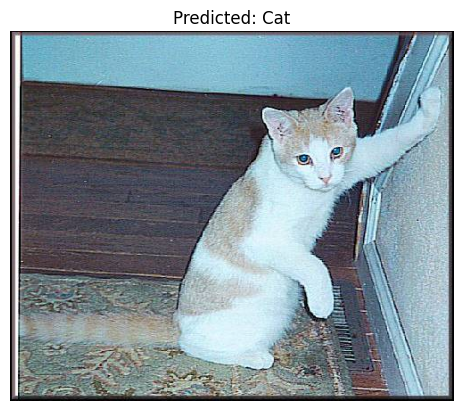

In [96]:
import matplotlib.pyplot as plt

plt.imshow(image.load_img("C:\\Users\\abdau\\OneDrive\\Desktop\\Exercise\\cat-and-dog\\test_set\\test_set\\cats\\cat.4001.jpg"))
plt.title(f"Predicted: {class_names[predicted_class[0]]}")
plt.axis("off")
plt.show()
